In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/indexProcessed.csv',index_col = 1,parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104224 entries, 1986-12-31 to 2021-05-31
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Open       104224 non-null  float64
 2   High       104224 non-null  float64
 3   Low        104224 non-null  float64
 4   Close      104224 non-null  float64
 5   Adj Close  104224 non-null  float64
 6   Volume     104224 non-null  float64
 7   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(1)
memory usage: 7.2+ MB


Index - Stock Indexes

Open - Opening values of the stock

High - Highest value of the stock in a day

Low - Lowest values of the stock in a day

Close - Closing values of the stock (in domestic currency)

Adj Close - Adjusted Closing values of the stock (After a dividend is announced)

Volume - Volume of stocks traded

CloseUSD - Closing values of the stock in USD


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


In [5]:
df.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1986-12-31,HSI,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1987-01-02,HSI,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
1987-01-05,HSI,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
1987-01-06,HSI,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
1987-01-07,HSI,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [6]:
df = df.drop('Close',axis='columns')

In [7]:
df.Index.unique()

array(['HSI', 'NYA', 'IXIC', '000001.SS', 'N225', 'N100', '399001.SZ',
       'GSPTSE', 'NSEI', 'GDAXI', 'SSMI', 'TWII', 'J203.JO'], dtype=object)

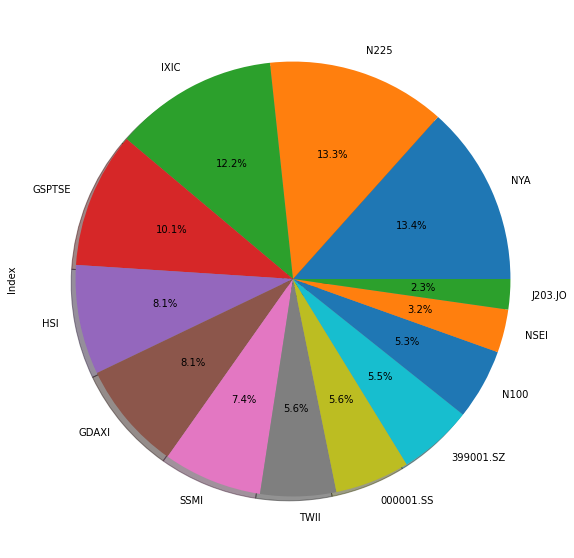

In [8]:
plt.figure(figsize=(10,10))
df.Index.value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

In [9]:
#NYA = df.groupby(df.Index).get_group('NYA')
IXIC = df.groupby(df.Index).get_group('IXIC')

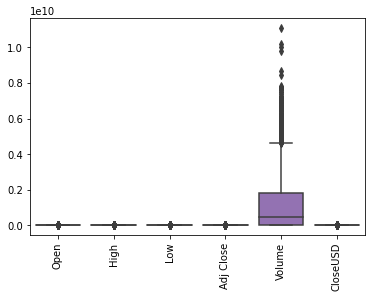

In [10]:
sns.boxplot(data=IXIC)
plt.xticks(rotation="90")
plt.show()

In [11]:
IXIC.Volume

Date
1971-02-05    0.000000e+00
1971-02-08    0.000000e+00
1971-02-09    0.000000e+00
1971-02-10    0.000000e+00
1971-02-11    0.000000e+00
                  ...     
2021-05-24    3.490650e+09
2021-05-25    4.084480e+09
2021-05-26    4.231140e+09
2021-05-27    5.057550e+09
2021-05-28    4.435220e+09
Name: Volume, Length: 12690, dtype: float64

Values equal to absolute zero exist in the 'Volume' column, therefore log transformation isn't feasible.

In [12]:
upper_lim = IXIC.Volume.mean() +3*IXIC.Volume.std()  ## Removing the outliers
lower_lim = IXIC.Volume.mean() -3*IXIC.Volume.std()

In [13]:
IXIC = IXIC[(IXIC.Volume > lower_lim) & (IXIC.Volume < upper_lim)]

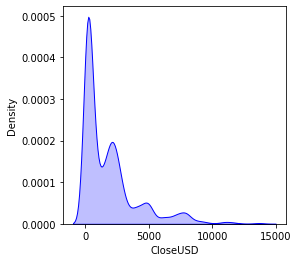

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))
ax =sns.kdeplot(IXIC['CloseUSD'], shade=True, color="b")

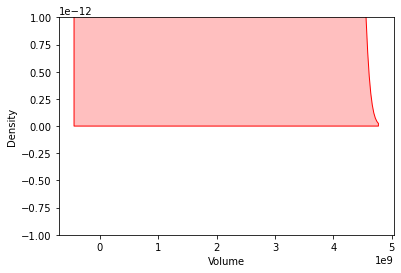

In [15]:
ax = sns.kdeplot(IXIC['Volume'], shade=True, color="r")

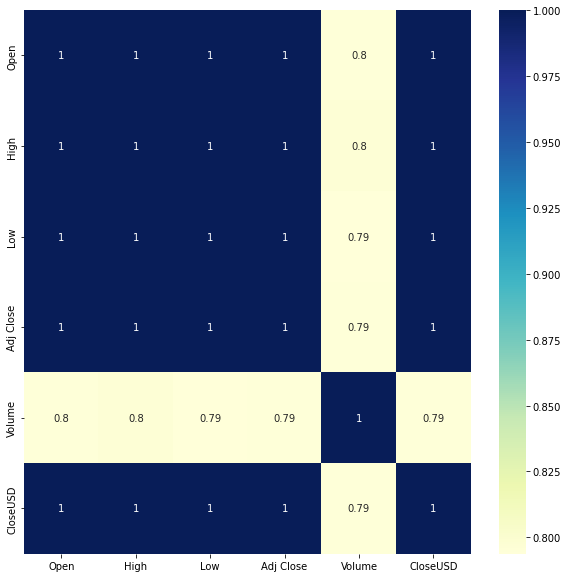

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(IXIC.corr(), cmap='YlGnBu', annot = True)

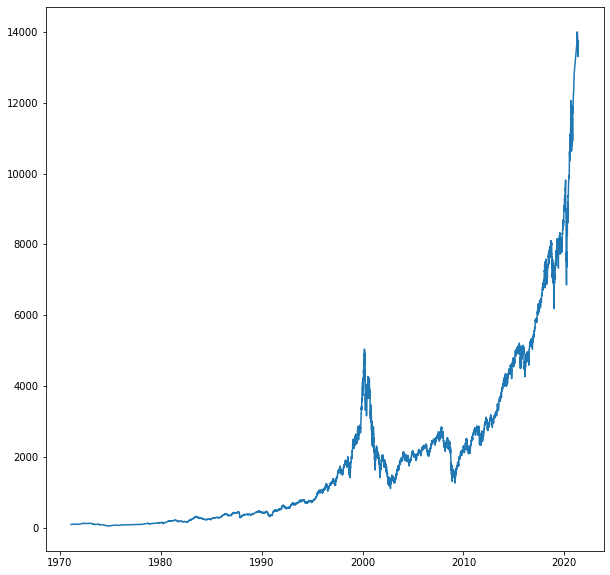

In [17]:
fig,ax = plt.subplots(figsize = (10,10))
ax.plot(IXIC['CloseUSD'])

In [18]:
IXIC = IXIC.drop(['Index'], axis = 'columns')

In [41]:
IXIC.head()

,Open,High,Low,Adj Close,Volume,CloseUSD
Date,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,0.0,100.000000
1971-02-08,100.839996,100.839996,100.839996,100.839996,0.0,100.839996
1971-02-09,100.760002,100.760002,100.760002,100.760002,0.0,100.760002
1971-02-10,100.690002,100.690002,100.690002,100.690002,0.0,100.690002
1971-02-11,101.449997,101.449997,101.449997,101.449997,0.0,101.449997


In [19]:
y = IXIC['CloseUSD']
X = IXIC.drop('CloseUSD',axis = 'columns')

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

It is crucial to scale our dataset since, the units of Volume and CloseUSD are evidently different.

In [21]:
mmc = MinMaxScaler()
scaled_IXIC = mmc.fit_transform(IXIC)
scaled_IXIC = pd.DataFrame(scaled_IXIC , columns = ['Open','High','Low','Adj Close','Volume','CloseUSD'])

In [22]:
scaled_IXIC

,Open,High,Low,Adj Close,Volume,CloseUSD
0,0.003235,0.003228,0.003259,0.003237,0.000000,0.003237
1,0.003296,0.003289,0.003320,0.003297,0.000000,0.003297
2,0.003290,0.003283,0.003314,0.003292,0.000000,0.003292
3,0.003285,0.003278,0.003309,0.003287,0.000000,0.003287
4,0.003339,0.003332,0.003364,0.003341,0.000000,0.003341
...,...,...,...,...,...,...
12521,0.953585,0.966370,0.960517,0.966979,0.917360,0.966979
12522,0.972193,0.970165,0.968284,0.962334,0.855443,0.962334
12523,0.967964,0.976766,0.974621,0.975976,0.806041,0.975976
12524,0.979745,0.979791,0.980455,0.975689,0.943165,0.975689


Splliting our dataset into training and testing samples,

In [23]:
train1 = scaled_IXIC.iloc[:int(len(IXIC)*0.8)]
test1 = scaled_IXIC.iloc[int(len(IXIC)*0.8):]

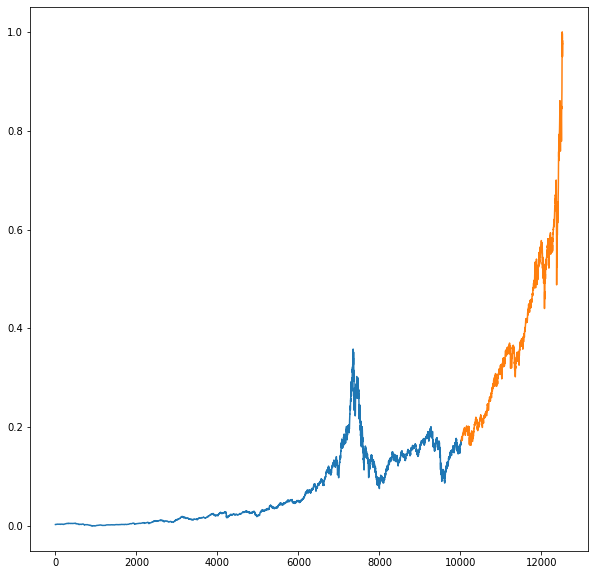

In [24]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(train1.CloseUSD)
ax.plot(test1.CloseUSD)

In [25]:
X_train1,X_test1,y_train1,y_test1 = train1.drop('CloseUSD',axis='columns'),test1.drop(['CloseUSD'],axis='columns'),train1['CloseUSD'],test1['CloseUSD']

Time to build the model, we first define a custom made function (build_model) which will look for the optimum no. of layers and find the best hyperparameters using Hyperband.

In [26]:
from tensorflow import keras 

In [27]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(5, 1)))

    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 16)
    model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
    model.add(keras.layers.Dense(10))

    hp_learning_rate = hp.Choice('learning_rate', values = [1e-1,1e-2, 1e-3, 1e-4,1e-5]) 

    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.MeanAbsoluteError(), 
                metrics = ['accuracy'])

    return model

In [29]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 4.8 MB/s 
     |████████████████████████████████| 1.6 MB 39.0 MB/s 


In [30]:
import keras_tuner as kt
tuner = kt.Hyperband(build_model,
                         objective = 'val_loss', 
                         max_epochs = 10,
                         factor = 3,)

tuner.search(X_train1, y_train1, epochs = 10, validation_data = (X_test1, y_test1)) 

Trial 30 Complete [00h 00m 21s]
val_loss: 0.0019546716939657927

Best val_loss So Far: 0.0019546716939657927
Total elapsed time: 00h 03m 22s


Using the best hyperparameters to train the model,

In [31]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [32]:
model = tuner.hypermodel.build(best_hps)
model.fit(X_train1, y_train1, epochs=50, validation_split=0.2)

Epoch 1/50
251/251 [==============================] - 2s 5ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 2/50
251/251 [==============================] - 1s 5ms/step - loss: 6.7685e-04 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 3/50
251/251 [==============================] - 1s 4ms/step - loss: 6.5235e-04 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 4/50
251/251 [==============================] - 1s 3ms/step - loss: 6.3023e-04 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 5/50
251/251 [==============================] - 1s 3ms/step - loss: 5.6722e-04 - accuracy: 0.0000e+00 - val_loss: 9.4425e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
251/251 [==============================] - 1s 3ms/step - loss: 5.7847e-04 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 7/50
251/251 [==============================] - 1s 3ms/step - loss: 5.

In [33]:
predicted = model.predict(X_test1)
y_test1_np = np.asarray(y_test1)

In [34]:
predicted.shape

(2506, 10)

Since the last layer had 10 neurons, we take the mean of all the outputs,

In [35]:
mean_predicted = []
for i in range(len(predicted)-1):
    value = predicted[i].mean()
    mean_predicted.append(value)

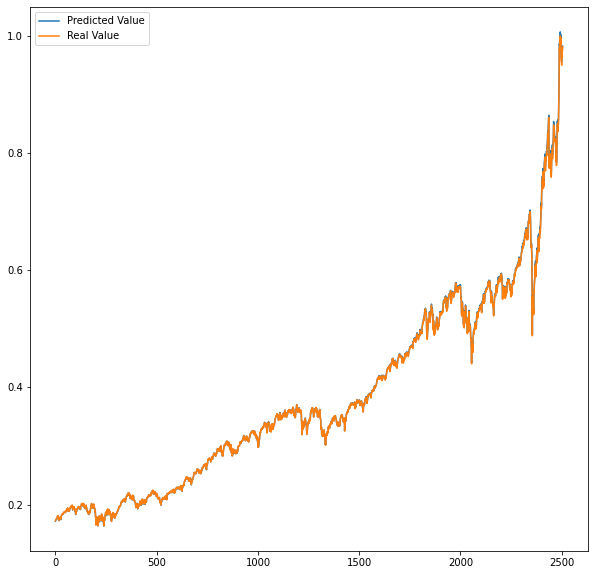

In [36]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(mean_predicted,label = 'Predicted Value')
ax.plot(y_test1_np,label = 'Real Value')
plt.legend(loc="upper left")

Our model has accurately predicted the closing values, given the independent variables

However the independent variables are not always available, in such a case we resort to time-series forecasting (works for this example)

